https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

T-test
* Approximate the distribution of a single sample mean

Test statistic
* A metric for the difference or effect of interest

t-statistic
* A standardized version of common test statistics such as means.

t-distribution
* A reference distribution derived from the null hypothesis and the observed t-statistics can be compared.

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random

In [2]:
ac = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/student-mat.csv')
ac

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
ac.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

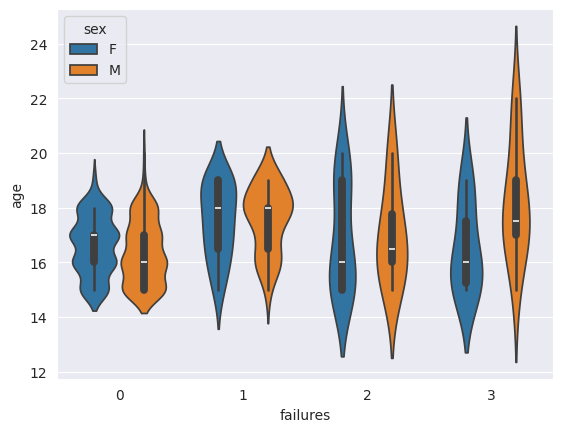

In [4]:
ax = sns.violinplot(data=ac, x='failures', y='age', hue="sex")

In [5]:
res = stats.ttest_ind(ac[ac.sex == 'F'].G3,
                      ac[ac.sex == 'M'].G3,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0198


* The alternative hypothesis is that the mean of the final grade for females is less than the mean of the final grades for male students.

* In resampling mode, we structure to reflect the observed data and the hypothesis to be tested.

* Not worrying whether the data is binary or numeric or samples sizes are balanced.

Type I error
* If you have 20 predictor variables and one outcome variable, all random, the odds are pretty good that at least one predictor will falsely turn out to be statistically significant, if you do a series of 20 significance test at the alpha = 0.05 level.

* Calculate this probability by first finding the probability that all will correctly test non-significant is 0.95, so the probability that all 20 will correctly test non-significant is 0.95^20 = 0.36.

Alpha Inflation
* The probability that at least one predictor will falsely test significant is the flip side or 1 - (probability tha t all will be non-significant) = 0.64

Fitting to the noise - Overfitting
* The more variables you add, the greater the probbaility that something will emerge as significant.

False discovery rate
* Across multiple test, the rate of making a Type I error

Adjustments os p-values
* Accounting for doing multiple test on the same data

Look for...
* Checking for multiple pairwise differences across groups
* Looking at multiple subgroup results ('we found no significant treatment effect overall, but we did find an effect for unmarried woman younger than 30')
* Trying a lot of statistical model
* Including lots of variables in models
* Asking a number of different questions

Degrees of freedom
* The number of degrees of freedom is an input to many statistical tests. when you use a sample to estimate the variance for a population, you will end up with an estimate that is slightly biased downward if you use in the denominator. If you use n - 1 in the denominator, the estimate will be free of bias.

* As n gets larger, the bias that would come from using n in the denominator disappears

* The number of degrees of freedom forms part of the calculation to standardize test statistics so they can be compared to reference distributions

Anova
* Comparison of multiple groups, each with numeric data, Anova test for a statistically difference among the groups.

Pairwise comparison
* A hypothesis test of the overall variance among multiple group means.

Omnibus test
* A single hypothesis test of the overall variance among multiple groups

F-statistic
* A standardized statistic that measures the extent to which differences among group means exceed what might be expected in a chance model

SS
* Sum of squares referring to deviations from some average value

In [6]:
ac

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
df = pd.DataFrame(ac, columns=['reason', 'absences'])
df

,reason,absences
0,course,6
1,course,4
2,other,10
3,home,2
4,home,4
...,...,...
390,course,11
391,course,3
392,course,3
393,course,0


* Combine all the data together in a single box
* Shuffle and draw out four groups
* Record the variance among the four groups means
* repeat steps 2-4 many times

In [8]:
observed_variance = df.groupby(['reason']).mean().var()['absences']
print('Observed mean:', df.groupby(['reason']).mean().values.ravel())
print('Variances:', observed_variance)

Observed mean: [3.97241379 7.14678899 5.61111111 6.64761905]
Variances: 1.9667113195530845


<Axes: xlabel='reason', ylabel='absences'>

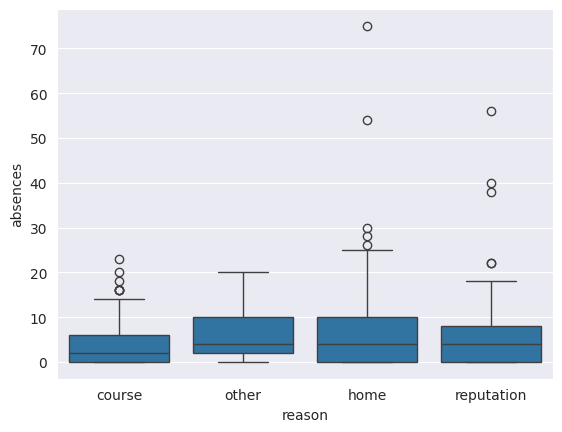

In [9]:
sns.boxplot(data=df, x='reason', y='absences')

In [10]:
def perm_test(df):
    df = df.copy()
    df['absences'] = np.random.permutation(df['absences'].values)
    return df.groupby(['reason']).mean().var()['absences']

In [11]:
perm_variance = [perm_test(df) for _ in range(3000)]
print('Prob', np.mean([var > observed_variance for var in perm_variance]))

Prob 0.07933333333333334


* Prob is the p-value

F-Statistic
* It is a statistical test for Anova based on the F-Statistic(The ratio of the variance across group means to the variance due to residual error, the higher the ratio, the more statistically significant)

* DF is degrees of freedom, 1 by definition
* Sum is "sum of squares", average from 0, squared, times 20(number of observations)
* Mean SQ is "mean of squared deviations"
* F value is the F-statistic
* Residuals, degrees of freedom is 20(all observations can vary)
* SS is the sum of squared difference between the individual observations ad the treatment means.
* MS is the sum of the squares divided by the degrees of freedom.
* F-Statistic is MS/MS(error), F-value depends only on this ratio and can be compared to a standard f-distribution to determine whether the differences among treatment means are greater than would be expected in random variation

Decomposition of variance

In [12]:
model = ols('absences ~ reason', data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
reason,3.0,755.460496,251.820165,4.022118,0.007737
Residual,391.0,24480.058492,62.608845,NaN,NaN


Two-Way Anova
* A second factor involved, let's say ( group A weekend, group A weekday, group B weekend)
* Identify the grand average effect and the treatment effect, we separate the weekend and the weekday observations for each group and find the difference between the averages for the subsets and the treatment average.

In [13]:
model = ols('absences ~ C(reason, Sum)*C(absences, Sum)', data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(reason, Sum)",3.0,7.554605e+02,2.518202e+02,1.419999e+29,0.0
"C(absences, Sum)",33.0,2.448006e+04,7.418200e+02,4.183080e+29,0.0
"C(reason, Sum):C(absences, Sum)",99.0,3.749383e-26,3.787255e-28,2.135611e-01,1.0
Residual,316.0,5.603887e-25,1.773382e-27,NaN,NaN
